In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [10]:
np.random.seed(42)
TRUE_SLOPE = 0.05     #seconds per lap of wear
INTERCEPT = 80        # fresh-tyre pace in seconds
NOISE_STD = 0.1       # lap-to-lap random noise
MAX_AGE = 40          # simulating 0-40 laps

In [11]:
lap_ages = np.arange(0, MAX_AGE +1)
lap_times = INTERCEPT + TRUE_SLOPE * lap_ages
lap_times += np.random.normal(0, NOISE_STD, size=lap_ages.shape)

In [12]:
df_dummy = pd.DataFrame({
    "tyre_age": lap_ages,
    "lap_times":lap_times
})

In [15]:
# FIT LINEAR MODEL
X = df_dummy[["tyre_age"]].values
y = df_dummy["lap_times"].values
reg = LinearRegression()
model = reg.fit(X, y)
slope = float(model.coef_[0])
intercept = float(model.intercept_)

print(f"Fitted Slope: {slope:.3f} s per lap")
print(f'Fitted intercept: {intercept: .3f} s')

Fitted Slope: 0.048 s per lap
Fitted intercept:  80.012 s


In [16]:
# COMPUTE UNDERCUT LAP
PIT_LOSS = 22       # seconds lost in lap
undercut = math.ceil(PIT_LOSS / slope)
print(f'Undercut pays after {undercut} laps')

Undercut pays after 455 laps


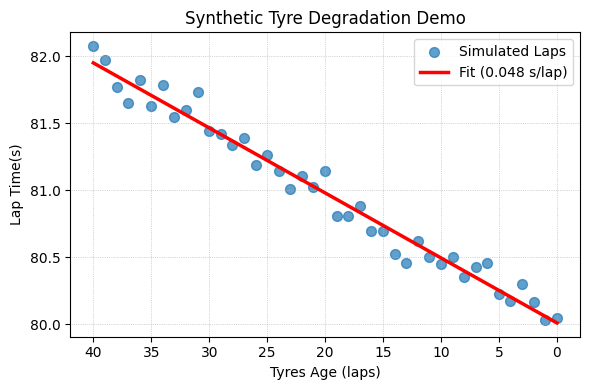

In [18]:
# PLOT
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(
    df_dummy['tyre_age'],
    df_dummy['lap_times'],
    s=50, alpha = 0.7,
    label = 'Simulated Laps'
)

xs = np.arange(0, MAX_AGE+1)
ax.plot(
    xs,
    model.predict(xs.reshape(-1,1)),
    c='red', lw=2.5,
    label= f'Fit ({slope:.3f} s/lap)'
)
ax.set_xlabel("Tyres Age (laps)")
ax.set_ylabel("Lap Time(s)")
ax.set_title("Synthetic Tyre Degradation Demo")
ax.invert_xaxis()
ax.grid(ls=":", lw=0.5)
ax.legend()
plt.tight_layout()
plt.show()